In [28]:
%matplotlib notebook

import sys
from typing import List, Tuple, Optional
from configparser import ConfigParser
import random
import time

sys.path.insert(0, "../../../global_route_planner/")

import numpy as np
import carla
from agents.navigation.local_planner import LocalPlanner, _compute_connection
from shapely.geometry import LineString, Point
from matplotlib import pyplot as plt
from IPython import display

from shapely.geometry import LineString, Point

from global_planner import get_client, spawn_vehicle, draw_waypoints, get_global_planner
from cartesian_to_frenet import get_frenet_from_cartesian, get_path_linestring

sys.path.insert(0, "../../../carla_utils/utils/")


from actors import Actor, Vehicle

In [14]:
def filter_waypoints(waypoints, road_id, lane_id = None):
    
    filtered_waypoints = []
    for wp in waypoints:
        
        if lane_id == None and wp.road_id == road_id:
            filtered_waypoints.append(wp) 
        elif wp.road_id == road_id and wp.lane_id==lane_id:
            filtered_waypoints.append(wp) 

    return filtered_waypoints


def spawn_vehicle(
    world: carla.libcarla.World,
    vehicle_type: str = "model3",
    spawn_point: Optional[carla.libcarla.Transform] = None,
) -> carla.libcarla.Vehicle:
    """
    Spawns a vehicle at a given spawn point. Default car model is 'model3'.
    If no spawn point is provided, randomly selects the spawn point from the set of pre-assigned spawn points in the map.
    """

    if spawn_point is None:
        spawn_point = random.choice(world.get_map().get_spawn_points())
    vehicle_blueprint = world.get_blueprint_library().filter(vehicle_type)[0]
    vehicle = world.spawn_actor(vehicle_blueprint, spawn_point)
    return vehicle

In [15]:
# Get client to interact with CARLA server
client = get_client()

# Get current CARLA world
world = client.get_world()

Connection to CARLA server established!


In [16]:
all_waypoints = world.get_map().generate_waypoints(1)

filtered_waypoints = filter_waypoints(all_waypoints, 37, -2)

draw_waypoints(world, filtered_waypoints)

In [18]:
wps = np.random.choice(filtered_waypoints, 10)


In [19]:
draw_waypoints(world, wps)

In [31]:
for actors in world.get_actors().filter('vehicle*'):
    actors.destroy()

In [29]:
actors = []
for i,wp in enumerate(wps):
    
    x = wp.transform.location.x
    y = wp.transform.location.y
    z = wp.transform.location.z + 0.5
    yaw = wp.transform.rotation.yaw
    transform = carla.Transform(carla.Location(x=x,y=y,z=z), carla.Rotation(yaw=yaw))

    actors.append(spawn_vehicle(world, 'model3', transform))
    
actors = [Vehicle(world, actor.id) for actor in actors]

RuntimeError: Spawn failed because of collision at spawn position

In [24]:
draw_waypoints(world, [wps[1]])
our_vehicle = actors[1]

In [25]:
ego_lane_linestring = get_path_linestring(filtered_waypoints)

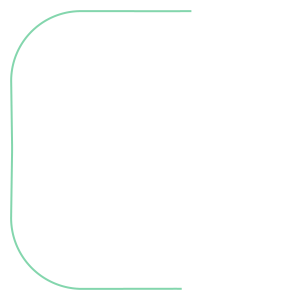

In [26]:
ego_lane_linestring